<a href="https://colab.research.google.com/github/harshitamotwani/ML_DL/blob/master/Handwriting_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwriting MNIST recognization 

In [3]:
import tensorflow as tf
from os import path, getcwd, chdir
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print("x_train_shape:{}, y_train_shape:{}".format(x_train.shape, y_train.shape))
print("x_test_shape:{}, y_test_shape:{}".format(x_test.shape, y_test.shape))

x_train_shape:(60000, 28, 28), y_train_shape:(60000,)
x_test_shape:(10000, 28, 28), y_test_shape:(10000,)


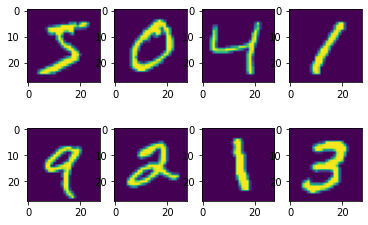

In [6]:
for i in range(8):
    plt.subplot(240+1+i)
    plt.imshow(x_train[i])
plt.show()

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
 model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [33]:
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

In [35]:
callbacks = myCallback()

In [36]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2626 - accuracy: 0.9257 - val_loss: 0.1495 - val_accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1161 - accuracy: 0.9659 - val_loss: 0.1024 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9763 - val_loss: 0.0877 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0926 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0771 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0792 - val_accuracy: 0.9758
Epoch 7/10
1853/1875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9915
Reached 99% accuracy so cancelling tra

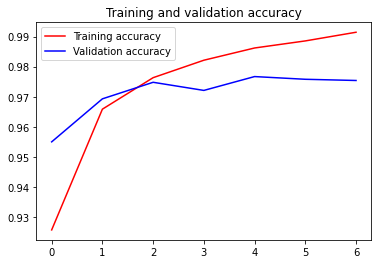

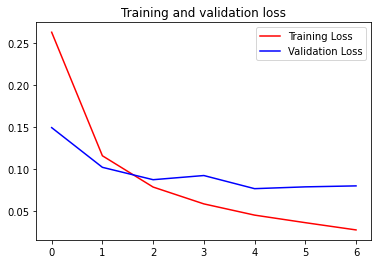

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()